In [1]:
#add interpretation as to why logit regression preformed the best

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Write Script that Pulls csv data from medicare site and saves down to separate folder
def pull_all_2017_datasets(base_url):
    for month_num in list(range(1,13)):
        file_name = "ful2017{}.csv".format(str(month_num))
        pull = pd.read_csv(base_url+file_name)
        pull.to_csv('/Users/jim_jack/Documents/Mod_3_Project/Mod_3_Project/raw_datasets/'+file_name)

In [4]:
# Files Saved; commenting out run file
# pull_all_2017_datasets('http://www.nber.org/data/federal-upper-limits/2017/')

In [5]:
# Explore initial dataset (June 2017)
df = pd.read_csv("/Users/jim_jack/Documents/Mod_3_Project/Mod_3_Project/raw_datasets/ful20176.csv",index_col="Unnamed: 0")

In [6]:
# confirmed no obvious NaN data
df.isna().any()

productgroup                        False
ingredient                          False
strength                            False
dosage                              False
route                               False
mdrunittype                         False
weightedaverageamps                 False
acaful                              False
packagesize                         False
ndc                                 False
arated                              False
multipliergreaterthan175percento    False
year                                False
month                               False
dtype: bool

In [7]:
df.head()

,productgroup,ingredient,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,arated,multipliergreaterthan175percento,year,month
0,7975,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Yes,Y,2017,6
1,4792,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Yes,Y,2017,6
2,4794,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Yes,Y,2017,6
3,4793,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Yes,Y,2017,6
4,4795,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Yes,Y,2017,6


In [8]:
strip_updated_ingredient = list(map(lambda ingr: ingr.strip(),list(df.ingredient)))
HCL_updated_ingredient = list(map(lambda ingr: ingr.replace('HYDROCHLORIDE','HCL'),strip_updated_ingredient))
HCL_updated_ingredient

['OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'RALOXIFENE HCL',
 'RALOXIFENE HCL',
 'RALOXIFENE HCL',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'HYDROXYUREA',
 'ENTECAVIR',
 'ENTECAVIR',
 'ENTECAVIR',
 'PRAVASTATIN SODIUM',
 'PRAVASTATIN SODIUM',
 'PRAVASTATIN SODIUM',
 'VALGANCICLOVIR HCL',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'IBANDRONATE SODIUM',
 'IBANDRONATE SODIUM',
 'MYCOPHENOLATE MOFETIL',
 'MYCOPHENOLATE MOFETIL',
 'MYCOPHENOLATE MOFETIL',
 'MYCOPHENOLATE MOFETIL',
 'CAPECITABINE',
 'NAPROXEN SODIUM',
 'NAPROXEN',
 'NAPROXEN',
 'LISINOPRIL',
 'ALENDRONATE SODIUM',
 'FINASTERID

In [9]:
# KEEP ME; UPDATES INGREDIENT LIST; UNCOMMENT WHEN KERNEL IS RERUN; THEN RECOMMENT; OTHERWISE WILL CAUSE DUPS


df['ingredient_normalized'] = HCL_updated_ingredient
df.drop('ingredient',axis=1,inplace=True)
# arated only has 146 negative occurances in 15K+ instances; removed for irrelevancy
df.drop('arated',axis=1,inplace=True)

In [10]:
# function takes a df column and returns a list of unique delimited (/ and ;) values; Lots going on here
def create_unique_ingr_list(df_column):
    local_ingr_list = []
#     Loop through single df column series and delimit values by backslash and semi-colon; creates list_of_lists
    for ingr in df_column:
        local_ingr_list.append(re.split('/|; ',ingr))
#     This line flattens the list of lists, strips away trailing and leading spaces, sets, and sorts alphabetically the drug list
    return sorted(list(set([item.strip() for sublist in local_ingr_list for item in sublist])))

In [11]:
unique_list_of_ingredients = create_unique_ingr_list(HCL_updated_ingredient)
len(unique_list_of_ingredients)

440

In [12]:
add_drugs = pd.DataFrame(columns=unique_list_of_ingredients)

In [13]:
df2 = df.join(add_drugs)

In [14]:
df2.fillna(0,inplace=True)
df2.head()

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,...,VENLAFAXINE HCL,VERAPAMIL HCL,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Y,...,0,0,0,0,0,0,0,0,0,0
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Y,...,0,0,0,0,0,0,0,0,0,0
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Y,...,0,0,0,0,0,0,0,0,0,0
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Y,...,0,0,0,0,0,0,0,0,0,0
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Y,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df3 = df2

In [16]:
df2.head()

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,...,VENLAFAXINE HCL,VERAPAMIL HCL,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Y,...,0,0,0,0,0,0,0,0,0,0
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Y,...,0,0,0,0,0,0,0,0,0,0
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Y,...,0,0,0,0,0,0,0,0,0,0
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Y,...,0,0,0,0,0,0,0,0,0,0
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Y,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def fill_ingredient_dummies(df_):
    for ingr in df_.columns[14:]:
        df_[ingr][df_.ingredient_normalized.str.contains(ingr,regex=False)] = 1

In [18]:
fill_ingredient_dummies(df3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df4 = df3

In [20]:
# Adding in multi-ingredient column
df4["SUM"] = df4.iloc[:,14:].sum(axis=1)
df4['Multi-Ingredient ?'] = 0
df4.loc[df4['SUM'] > 1, 'Multi-Ingredient ?'] = 1
df4

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,...,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.234670,30.0,2323030,Y,...,0,0,0,0,0,0,0,0,2,1
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.952780,30.0,2323130,Y,...,0,0,0,0,0,0,0,0,2,1
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.129000,30.0,2323230,Y,...,0,0,0,0,0,0,0,0,2,1
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.742670,30.0,2323330,Y,...,0,0,0,0,0,0,0,0,2,1
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.192900,30.0,2323430,Y,...,0,0,0,0,0,0,0,0,2,1
5,5028,20 MG ...,CAPSULE DR,ORAL,CAP,0.239553,0.419218,60.0,2323560,N,...,0,0,0,0,0,0,0,0,1,0
6,5029,30 MG ...,CAPSULE DR,ORAL,CAP,0.242719,0.424758,30.0,2324030,N,...,0,0,0,0,0,0,0,0,1,0
7,5029,30 MG ...,CAPSULE DR,ORAL,CAP,0.242719,0.424758,90.0,2324090,N,...,0,0,0,0,0,0,0,0,1,0
8,5030,60 MG ...,CAPSULE DR,ORAL,CAP,0.410402,0.718204,1000.0,2327004,N,...,0,0,0,0,0,0,0,0,1,0
9,5030,60 MG ...,CAPSULE DR,ORAL,CAP,0.410402,0.718204,30.0,2327030,N,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df4_strength = df4.strength
df4_strength_list = list(map(lambda x: x.replace(" ",""),df4_strength))
len(set(df4_strength_list))

317

In [22]:
df4_updated_ingredient = list(map(lambda stren: stren.replace(' ',''),list(df4.strength)))
df4['strength_normalized'] = df4_updated_ingredient
df4.drop('strength',axis=1,inplace=True)

In [23]:
values = df4.strength_normalized.value_counts()
df4_values = values.rename_axis('type').reset_index(name='counts')

In [24]:
df4.multipliergreaterthan175percento[df4.multipliergreaterthan175percento == 'N'] = 0
df4.multipliergreaterthan175percento[df4.multipliergreaterthan175percento == 'Y'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Exploratory Data Analysis

Text(0.5, 1.0, 'Classifications')

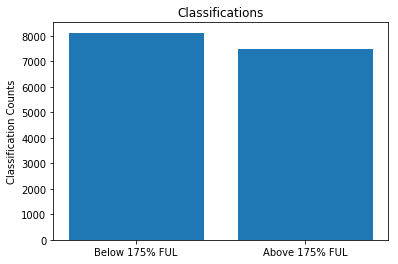

In [25]:
classification = df4.multipliergreaterthan175percento.value_counts()
df4_class = classification.rename_axis('class').reset_index(name='counts')
plt.bar(df4_class['class'],df4_class['counts'])
plt.xticks(ticks=[0,1],labels=['Below 175% FUL',"Above 175% FUL"])
plt.ylabel('Classification Counts')
plt.title('Classifications')

In [26]:
df4_class.head()

,class,counts
0,0,8120
1,1,7498


In [27]:
# Dosage Data Viz
df4_dosage = df4.dosage.value_counts()
df4_dosage_values = df4_dosage.rename_axis('dosage').reset_index(name='counts')
df4_dosage_values
# plt.bar(df4_dosage_values['dosage'],df4_dosage_values['counts'])
# plt.ylabel('value counts')
# plt.title('dosage value counts')

,dosage,counts
0,TABLET,10957
1,CAPSULE,1779
2,"TABLET, EXTENDED RELEASE",622
3,"CAPSULE, EXTENDED RELEASE",262
4,TAB ER 24H,174
5,"TABLET, ORALLY DISINTEGRATING",147
6,"CAPSULE, DELAYED REL PELLETS",137
7,"TABLET, DELAYED RELEASE",137
8,CAPSULE DR,132
9,TAB CHEW,93


In [28]:
# Route Data Viz; resampling?
df4_route = df4.route.value_counts()
df4_route_values = df4_route.rename_axis('route').reset_index(name='counts')
df4_route_values
# plt.bar(df4_route_values['route'],df4_route_values['counts'])
# plt.ylabel('value counts')
# plt.title('route value counts')

,route,counts
0,ORAL,15171
1,TOPICAL,134
2,TRANSDERMAL,77
3,OPHTHALMIC,69
4,ORAL-28,51
5,TRANSDERM,37
6,RECTAL,20
7,SUBLINGUAL,19
8,NASAL,13
9,"ORAL, RECTAL",8


In [29]:
# mdrunittype Data Viz; resampling?
df4_mdrunittype = df4.mdrunittype.value_counts()
df4_mdrunittype_values = df4_mdrunittype.rename_axis('mdrunittype').reset_index(name='counts')
df4_mdrunittype_values
# plt.bar(df4_mdrunittype_values['mdrunittype'],df4_mdrunittype_values['counts'])
# plt.ylabel('value counts')
# plt.title('mdrunittype value counts')

,mdrunittype,counts
0,TAB,12480
1,CAP,2546
2,ML,349
3,TDP,109
4,GM,105
5,SUP,15
6,EA,14


#### Finalize Cleaning

In [30]:
df5 = pd.get_dummies(df4,columns=["dosage"])

In [31]:
df6 = pd.get_dummies(df5,columns=['route'])

In [32]:
df7 = pd.get_dummies(df6,columns=['strength_normalized'])

In [33]:
df8 = pd.get_dummies(df7,columns=['mdrunittype'])

In [34]:
data_for_model = df8.drop(['productgroup','ndc','year','month','ingredient_normalized'],axis=1)

### Train, Test, Split

In [35]:
data_for_model.head()

,weightedaverageamps,acaful,packagesize,multipliergreaterthan175percento,ABACAVIR SULFATE,ACAMPROSATE CALCIUM,ACARBOSE,ACETAMIN,ACETAMINOPHEN,ACETAZOLAMIDE,...,strength_normalized_9.5MG/24HR,strength_normalized_90MG,strength_normalized_9MG,mdrunittype_CAP,mdrunittype_EA,mdrunittype_GM,mdrunittype_ML,mdrunittype_SUP,mdrunittype_TAB,mdrunittype_TDP
0,2.276870,7.23467,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2.400121,7.95278,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.713770,13.12900,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2.758260,9.74267,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3.614041,14.19290,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
X = data_for_model.drop(['multipliergreaterthan175percento'],axis=1)
y = data_for_model.multipliergreaterthan175percento

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test = X_test.astype(int)
y_test = y_test.astype(int)

### Logistic Regression

In [38]:
#original setup --> logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
logreg = LogisticRegression()
logit_model = logreg.fit(X_train,y_train)
logit_model

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
y_pred_train_logit = logit_model.predict(X_train)
y_pred_test_logit = logit_model.predict(X_test)

In [40]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = metrics.accuracy_score(true, preds)
    f1 = metrics.f1_score(true, preds)
    recall = metrics.recall_score(true, preds)
    precision = metrics.precision_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    print("Recall: {}".format(recall))
    print("Precision: {}".format(precision))

In [41]:
y_test.value_counts()
y_test.mean()
1 - y_test.mean()
null_accuacy_general = y_test.value_counts().head(1) / len(y_test)

print("Null Accuracy: "+str(null_accuacy_general))
print("")
print("Training Metrics")
display_acc_and_f1_score(y_train, y_pred_train_logit, model_name='Logit')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, y_pred_test_logit, model_name='Logit')

Null Accuracy: 0    0.5137
Name: multipliergreaterthan175percento, dtype: float64

Training Metrics
Model: Logit
Accuracy: 0.9437377273115342
F1-Score: 0.9400527608478122
Recall: 0.9228433648865869
Precision: 0.9579162031887282

Testing Metrics
Model: Logit
Accuracy: 0.9421254801536492
F1-Score: 0.9394426580921758
Recall: 0.923117430226435
Precision: 0.9563557010365521


In [42]:
list_of_feature_columns = pd.DataFrame(data_for_model.columns.drop('multipliergreaterthan175percento'))

In [43]:
feature_coefs = pd.DataFrame(logit_model.coef_[0])

In [44]:
pd_logit_coefs = list_of_feature_columns.merge(feature_coefs, left_index=True,right_index=True)

In [45]:
pd_logit_coefs.columns = ["feature_name",'coefficient']

In [46]:
top_coef_ = pd_logit_coefs[pd_logit_coefs['coefficient'].isin(list(pd_logit_coefs.coefficient.nlargest(10)))].sort_values(by="coefficient",ascending=False)

In [47]:
bot_coef_ = pd_logit_coefs[pd_logit_coefs['coefficient'].isin(list(pd_logit_coefs.coefficient.nsmallest(10)))].sort_values(by="coefficient")

In [48]:
significant_coefs = pd.concat([top_coef_,bot_coef_]).sort_values(by="feature_name")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

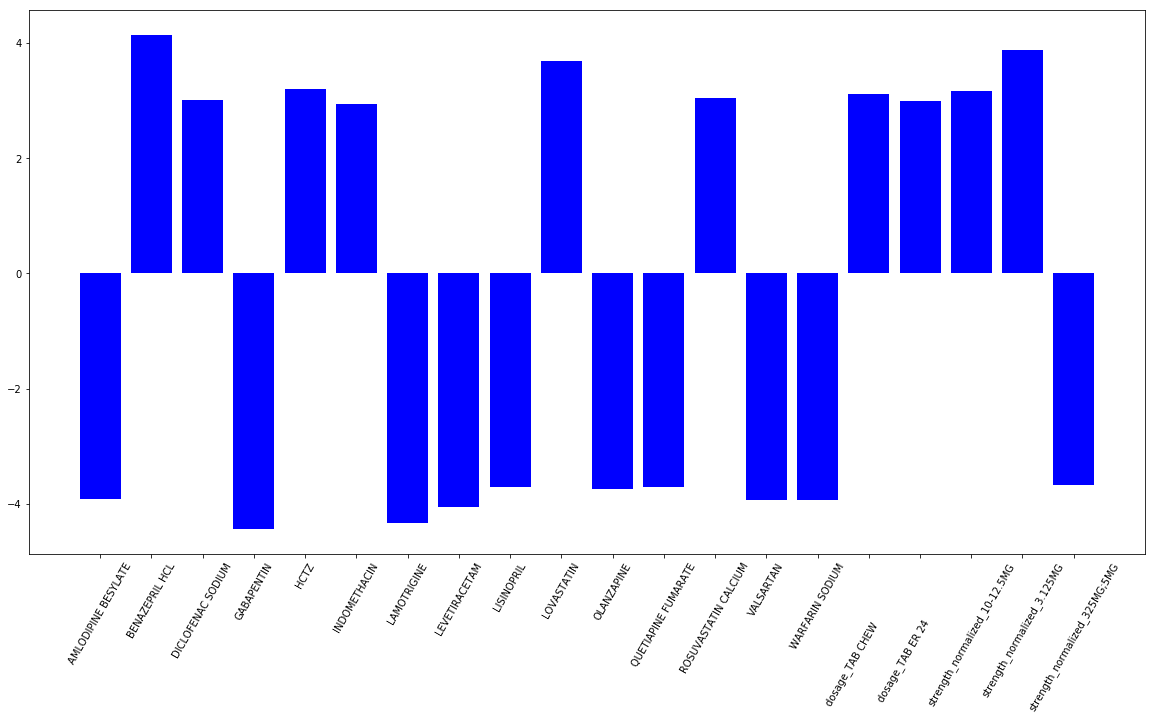

In [49]:
fig = plt.figure(figsize=[20,10])
plt.bar(significant_coefs['feature_name'],significant_coefs['coefficient'],color='blue')
plt.xticks(rotation=60)

In [50]:
from sklearn.model_selection import GridSearchCV

params = {'fit_intercept':[True, False]}
logreg_2 = LogisticRegression()
logit_gs = GridSearchCV(logreg_2,params,cv=5)
logit_model_gs = logit_gs.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [51]:
y_pred_train_logit_gs = logit_model_gs.predict(X_train)
y_pred_test_logit_gs = logit_model_gs.predict(X_test)

In [52]:
print("Training Metrics")
display_acc_and_f1_score(y_train, y_pred_train_logit_gs, model_name='Logit_GS')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, y_pred_test_logit_gs, model_name='Logit_GS')

Training Metrics
Model: Logit_GS
Accuracy: 0.9437377273115342
F1-Score: 0.9400527608478122
Recall: 0.9228433648865869
Precision: 0.9579162031887282

Testing Metrics
Model: Logit_GS
Accuracy: 0.9421254801536492
F1-Score: 0.9394426580921758
Recall: 0.923117430226435
Precision: 0.9563557010365521


In [53]:
from sklearn.metrics import roc_curve, auc

In [54]:
y_score_logit = logit_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score_logit)
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.9854247158471924


AUC: 0.9854247158471924


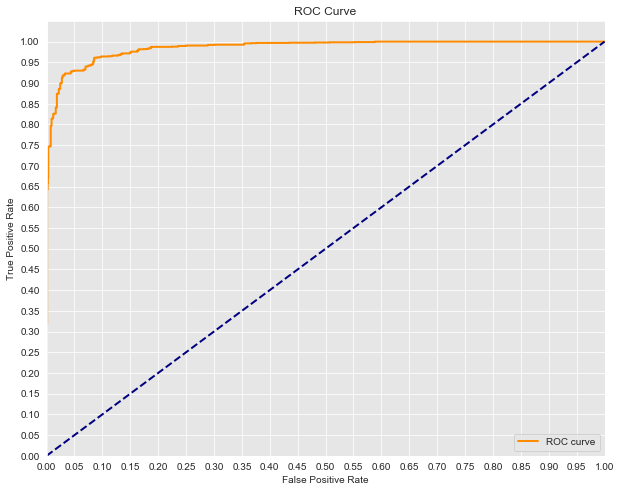

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [56]:
def pred_list_creator(prob_array): 
    pred_pos = []
    pred_neg = []
    for x in prob_array:
        if x[1]>.5:
            pred_pos.append(x[1])
        else:
            pred_neg.append(x[1])
    return pred_pos, pred_neg

In [57]:
log_gs_prob_data = logit_model_gs.predict_proba(X_test)
pred_pos, pred_neg = pred_list_creator(log_gs_prob_data)

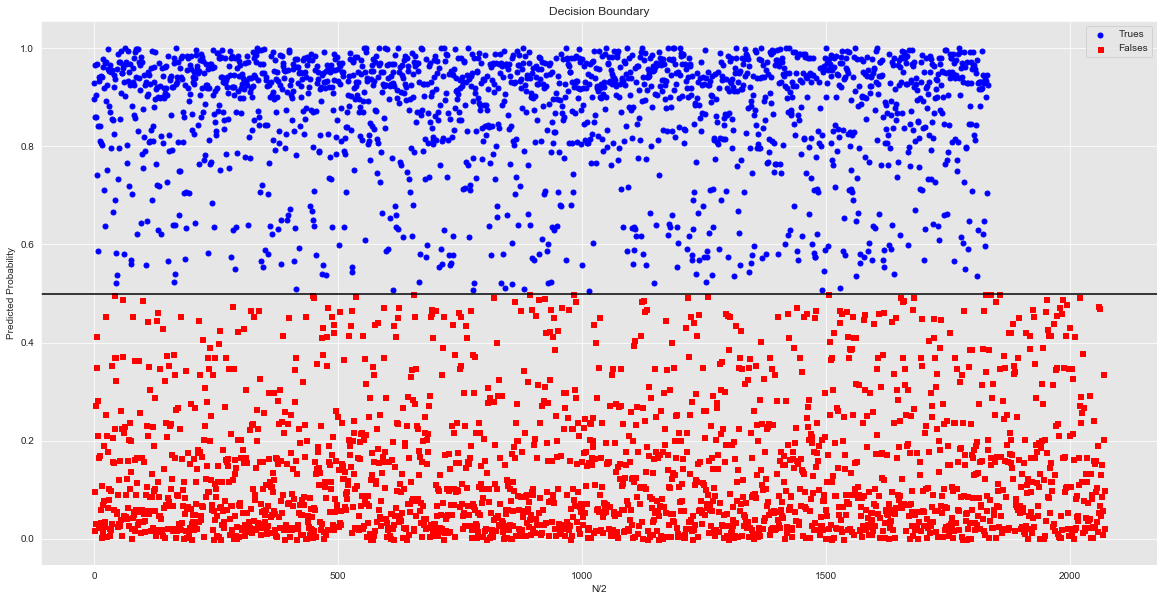

In [58]:
def plot_decision_boundary(trues, falses):
    fig = plt.figure(figsize=[20,10])
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

plot_decision_boundary(pred_pos, pred_neg)

### Scaling/Regularization

In [59]:
# REGULARIZATION STEP
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
trans_X_train = scaler.fit_transform(X_train)
trans_X_test = scaler.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Gradient Boosting, AdaBoosting

In [60]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

In [61]:
adaboost_clf.fit(trans_X_train, y_train.astype(int))
gbt_clf.fit(trans_X_train, y_train.astype(int))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [62]:
adaboost_train_preds = adaboost_clf.predict(trans_X_train)
adaboost_test_preds = adaboost_clf.predict(trans_X_test)
gbt_clf_train_preds = gbt_clf.predict(trans_X_train)
gbt_clf_test_preds = gbt_clf.predict(trans_X_test)

In [63]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    recall = metrics.recall_score(true, preds)
    precision = metrics.precision_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    print("Recall: {}".format(recall))
    print("Precision: {}".format(precision))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7657303850422608
F1-Score: 0.7857589006870705
Recall: 0.8987319164136452
Precision: 0.6980163684283535

Model: Gradient Boosted Trees
Accuracy: 0.8264321693844446
F1-Score: 0.8374510274246423
Recall: 0.9353455974281122
Precision: 0.7581065431383903

Testing Metrics
Model: AdaBoost
Accuracy: 0.753393085787452
F1-Score: 0.7782638728989179
Recall: 0.889942074776198
Precision: 0.6914893617021277

Model: Gradient Boosted Trees
Accuracy: 0.8176696542893725
F1-Score: 0.8305568776772966
Recall: 0.9189046866771985
Precision: 0.7577073382544507


### Support Vector Machine ('rbf')

In [64]:
from sklearn import svm
SVM_method = svm.SVC(kernel='rbf')
svm_model = SVM_method.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
y_pred_train_svm = svm_model.predict(trans_X_train)
y_pred_test_svm = svm_model.predict(trans_X_test)

In [66]:
print("Training Metrics")
display_acc_and_f1_score(y_train, y_pred_train_svm, model_name='rbf SVM')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, y_pred_test_svm, model_name='rbf SVM')

Training Metrics
Model: rbf SVM
Accuracy: 0.5219841202083155
F1-Score: 0.0
Recall: 0.0
Precision: 0.0

Testing Metrics
Model: rbf SVM
Accuracy: 0.5137003841229193
F1-Score: 0.0
Recall: 0.0
Precision: 0.0


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [68]:
NBC = GaussianNB()
nbc_model = NBC.fit(trans_X_train,y_train)

In [69]:
y_pred_train_nbc = nbc_model.predict(trans_X_train)
y_pred_test_nbc = nbc_model.predict(trans_X_test)

In [70]:
print("Training Metrics")
display_acc_and_f1_score(y_train, y_pred_train_nbc, model_name='Naive Bayes')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, y_pred_test_nbc, model_name='Naive Bayes')

Training Metrics
Model: Naive Bayes
Accuracy: 0.8447024673439768
F1-Score: 0.8060974309775076
Recall: 0.6752991605643865
Precision: 0.9997355896351137

Testing Metrics
Model: Naive Bayes
Accuracy: 0.7195902688860435
F1-Score: 0.7762109135499694
Recall: 1.0
Precision: 0.6342685370741483


## NEXT STEPS